In [ ]:
# Import these libraries to perform the Linear Regression Machine Learning Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [48]:
# Load CSV file into a DataFrame

# This file shows 4104 points of data, each indicating the number of cars from N,S,E,W direction during a 1 minute segment.
# This file contains minute segment data from Friday morning to Sunday night.

dataframe = pd.read_csv('data.txt')
print(dataframe)



         Day Time Start Time End  North  South  East  West
0     Friday      02:40    02:41      1      0     0     0
1     Friday      02:41    02:42      0      0     0     0
2     Friday      02:42    02:43      1      0     0     0
3     Friday      02:43    02:44      1      0     0     0
4     Friday      02:44    02:45      0      0     0     0
...      ...        ...      ...    ...    ...   ...   ...
4100  Sunday      23:53    23:54      0      1     2     0
4101  Sunday      23:54    23:55      0      0     2     0
4102  Sunday      23:55    23:56      0      0     2     0
4103  Sunday      23:56    23:57      0      0     0     0
4104  Sunday      23:57    23:58      3      0     0     0

[4105 rows x 7 columns]


In [49]:
# Reset the index and add a column that totals the amount of cars from N, S, E, W

dataframe = dataframe.reset_index(drop=True)
dataframe['total'] = dataframe['North'] + dataframe['South'] + dataframe['East'] + dataframe['West']

In [52]:
# Get dataframe that is strictly time vs total
# This will be called our "plain" model
# Create a new DataFrame with the index and column 'A'
dataframe_plain= dataframe[['total']].reset_index()
dataframe_plain.columns = ['Time (m)', 'total']  # Rename columns for clarity

print("\nPlain Dataframe:")
print(dataframe_plain)



Plain Dataframe:
      Time (m)  total
0            0      1
1            1      0
2            2      1
3            3      1
4            4      0
...        ...    ...
4100      4100      3
4101      4101      2
4102      4102      2
4103      4103      0
4104      4104      3

[4105 rows x 2 columns]


/tmp/ipykernel_14906/3372972722.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


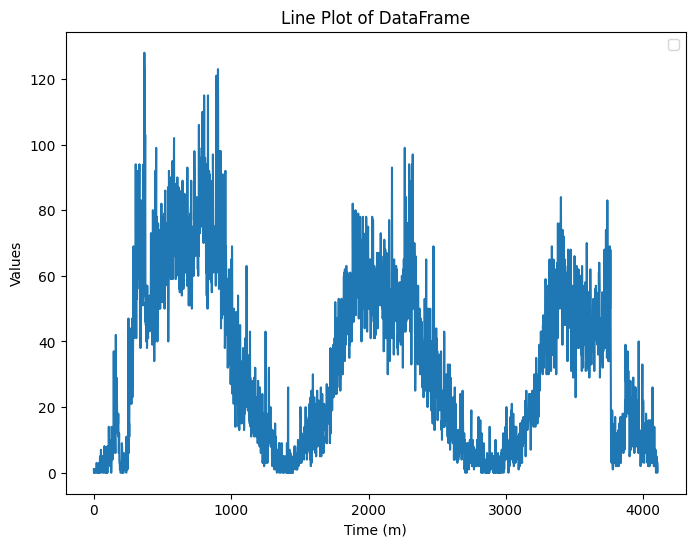

In [53]:
# Visual view of our data Time vs Total


# Plot the DataFrame
plt.figure(figsize=(8, 6))
plt.plot(dataframe_plain['Time (m)'], dataframe_plain['total'])

# Add labels and legend
plt.title("Line Plot of DataFrame")
plt.xlabel("Time (m)")
plt.ylabel("Values")
plt.legend()
plt.show()


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score

# Our regresssion model

# INPUT: dataframe
#        target column as string



target_column = 'total'
def regression_model(dataframe, target_column):
    """
    Train a regression model on a given pandas DataFrame.
    
    Parameters:
        dataframe (pd.DataFrame): The input data as a pandas DataFrame.
        target_column (str): The name of the target column.
    
    Returns:
        model: The trained regression model.
        metrics: A dictionary containing MSE and R² score.
    """
    # Separate features and target
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    
    # Compute MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Compute Accuracy
    # accuracy = accuracy_score(y_test, y_pred)

    # Compute precision
    #precision = precision_score(y_test, y_pred)

    # Compute Recall
    #recall = recall_score(y_test, y_pred)
    
    metrics = {
        "Mean Squared Error": mse,
        "R² Score": r2,
        "Mean Absolute Error": mae,
        #"Accuracy": accuracy,
        #"Precision": precision,
        #"Recall": recall,
    }

    return model, metrics

# Example usage
# Assuming `df` is your DataFrame and 'target' is the column you want to predict:
model, metrics = regression_model(dataframe_plain, target_column)
print(metrics)

{'Mean Squared Error': np.float64(672.9058898066618), 'R² Score': 0.02105354474065324, 'Mean Absolute Error': np.float64(22.6389356285814)}


In [60]:
# Try a new dataframe
# This time include the columns N, S, W, E
# Drop 'Day' because linear regression will not recognize strings and drop start and end times because it's erroneous

dataframe_nwes = dataframe
dataframe_nwes.drop(columns=['Day','Time Start','Time End'], axis=1, inplace=True)

print(dataframe_nwes)


      North  South  East  West  total
0         1      0     0     0      1
1         0      0     0     0      0
2         1      0     0     0      1
3         1      0     0     0      1
4         0      0     0     0      0
...     ...    ...   ...   ...    ...
4100      0      1     2     0      3
4101      0      0     2     0      2
4102      0      0     2     0      2
4103      0      0     0     0      0
4104      3      0     0     0      3

[4105 rows x 5 columns]


In [61]:
model, metrics = regression_model(dataframe_nwes, 'total')
print(metrics)

{'Mean Squared Error': np.float64(2.0576478261103055e-28), 'R² Score': 1.0, 'Mean Absolute Error': np.float64(1.1762143566613413e-14)}
